In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data.prepare_data import *
from data.prepare_word2vec_ed import *

# Counts of answers for knowledge components
The counts contain all answers (no duplicated answers from user on one question) for knowledge components

In [2]:
# dropping duplicates of answers for each user and dropping rows where the parent_kc is multiple times the same for one answer
ps_data = get_ps_data().drop_duplicates(['user', 'question_id', 'parent_kc'], keep='first')

In [3]:
count_kcs = ps_data['parent_kc'].value_counts().head(30)
# exclude I/Y Vyjmenovana slova
count_kcs = count_kcs.drop(1)
system_kc = pd.read_csv('data/system_kc.csv', sep=';')
kc_table = system_kc[['id','name']].set_index('id')
kc_answers_count = count_kcs.to_frame().join(kc_table)
kc_answers_count.columns = ['count', 'name']
kc_answers_count.index.names = ['kc_id']

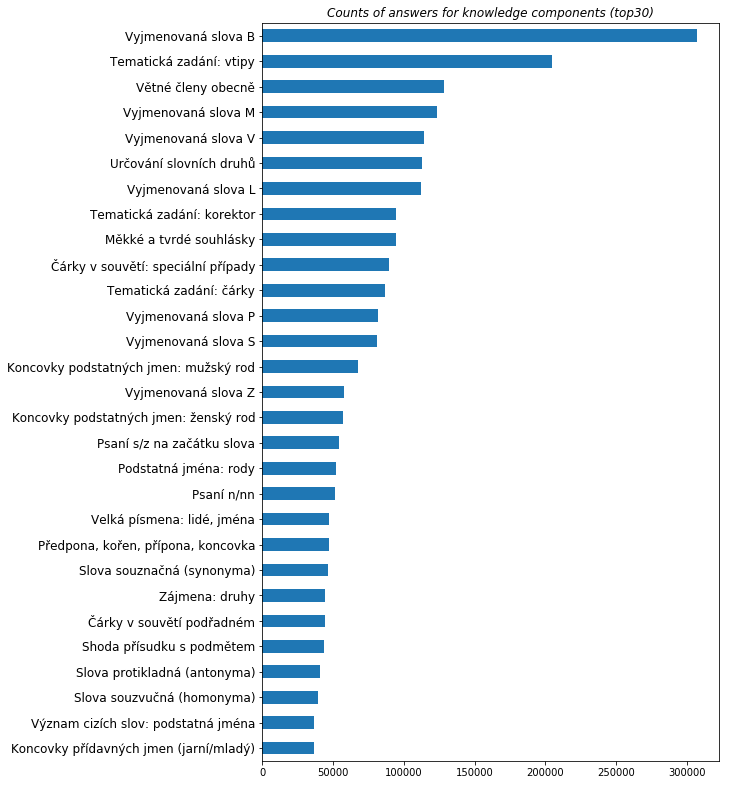

In [4]:
df = kc_answers_count
labels= df['name'].tolist()
df.plot(kind='barh', legend=False)
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(labels, fontsize=12)
plt.tight_layout()
plt.gcf().set_size_inches(20, 12)
plt.ylabel('')
plt.title('Counts of answers for knowledge components (top30)', color='black', fontsize=12, fontstyle='italic')
# plt.savefig('visualizations/counts_of_answers_for_knowledge_components.png')
plt.show()

# Counts of answers for practice sets
The counts contain all answers (no duplicated answers from user on one question) for practice sets

In [5]:
ps_data = get_ps_data().drop_duplicates(['user', 'question_id', 'ps'], keep='first')

In [6]:
system_ps = pd.read_csv('data/system_ps.csv', sep=';')
count_practice_sets = ps_data['ps'].value_counts().head(30)
practice_sets_table = system_ps[['id','url']].set_index('id')
practice_sets_answers_count = count_practice_sets.to_frame().join(practice_sets_table)
practice_sets_answers_count.columns = ['count', 'url']
practice_sets_answers_count.index.names = ['ps_id']

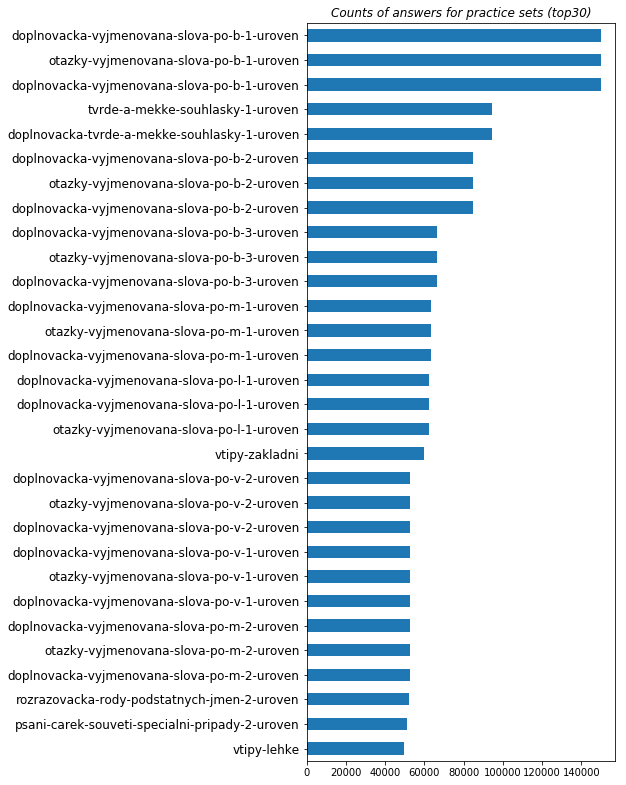

In [7]:
df = practice_sets_answers_count
df.plot(kind='barh', legend=False)
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(df['url'], fontsize=12)
plt.tight_layout()
plt.gcf().set_size_inches(20, 12)
plt.title('Counts of answers for practice sets (top30)', color='black', fontsize=12, fontstyle='italic')
plt.ylabel('')
# plt.savefig('visualizations/counts_of_answers_for_practice_sets.png')
plt.show()

# Missing words in word2vec model

In [8]:
from gensim.models import Word2Vec

In [9]:
ps_data = get_ps_data()
model = Word2Vec.load('utils/word2vec.model')
final_data = ps_data[ps_data['question'].apply(lambda x: x.count('_')) == 1].copy()

In [10]:
X, data = get_word2vec_items(model, final_data)
final_data.drop_duplicates(['question_id'], inplace=True)
final_data['solution'] = get_solutions(final_data, method='fillin')

## Count of missing words in the model
Unique solutions of fill-in words for questions.

In [11]:
print("%d out of %d words are not in our word2vec model" % (len(final_data.solution.unique()) - len(data.solution.unique()), len(final_data.solution.unique())))

669 out of 4746 words are not in our word2vec model


## Questions whose fill-in word is missing in the model
Some words occur multiple times in various questions.
This is for exploration which exercises are not ok with our approach and word2vec (for example questions from concept Predlozky s/z (because it is only about preposition 's', 'z')).

In [12]:
print("%d out of %d questions (their fill-in word) are not in our word2vec model" % (len(final_data.question.unique()) - len(data.question.unique()), len(final_data.question.unique())))

789 out of 5562 questions (their fill-in word) are not in our word2vec model


In [13]:
def print_missing_word2vec_items(model, data):
    for solution, question, url, ps in zip(data['solution'], data['question'], data['url'], data['ps']):
        try:
            x = model.wv[solution]
        except KeyError:
            print("Word '{}' in question '{}'| URL: {}| PS: {} | is not in vocabulary of your model, therefore it's not in the resulting data.".format(solution, question, url, ps))

In [14]:
print_missing_word2vec_items(model, final_data)

Word 'zabydlený' in question 'zab_dlený'| URL: doplnovacka-vyjmenovana-slova-po-b-1-uroven| PS: 1 | is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'bystrozraký' in question 'b_strozraký'| URL: doplnovacka-vyjmenovana-slova-po-b-1-uroven| PS: 1 | is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'blýskavé' in question 'bl_skavé náušnice'| URL: doplnovacka-vyjmenovana-slova-po-l-2-uroven| PS: 5 | is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'přežvykoval' in question 'kůň přežv_koval starý chléb'| URL: doplnovacka-vyjmenovana-slova-po-v-1-uroven| PS: 12 | is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'povykovat' in question 'pov_kovat'| URL: doplnovacka-vyjmenovana-slova-po-v-1-uroven| PS: 12 | is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'odvykat' in question 'odv_kat'| URL: doplnovacka-vyjmenovana-slova-po-v